In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Check Signals

In [2]:
infile = '/Users/yuntse/data/coherent/preLArTPC/geant4/nueArCCSignal/nueArCC_sns_yDir_g4_00.root'

In [3]:
df = pd.DataFrame(ROOT.RDataFrame("edep", infile).AsNumpy())

In [4]:
df

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
0,0.003206,249.473938,-137.999022,-108.570852,0,0,22,0.029818,249.870874,-134.836050,-108.691097,5
1,0.026611,249.474142,-138.002589,-108.572582,0,5,11,0.537610,249.473938,-137.999022,-108.570852,6
2,0.000000,300.000000,-205.218492,-59.207864,0,0,22,2.716056,249.870874,-134.836050,-108.691097,4
3,0.000000,357.477017,-285.917543,-2.471413,0,0,22,2.716056,300.000000,-205.218492,-59.207864,4
4,0.000000,359.131160,-287.445316,0.926159,0,0,22,1.677215,357.477017,-285.917543,-2.471413,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1466338,0.000000,-458.463295,-37.568693,160.238065,9999,2,22,1.169300,-300.000000,-29.872608,145.831510,17
1466339,0.000000,-29830.261321,-1464.068418,2830.549981,9999,2,22,1.169300,-458.463295,-37.568693,160.238065,17
1466340,0.000000,-185.963264,250.000000,139.053086,9999,0,12,32.388343,-185.963264,-24.096118,139.053086,1
1466341,0.000000,-185.963264,420.734672,139.053086,9999,0,12,32.388343,-185.963264,250.000000,139.053086,1


In [5]:
nEvents = df.event.max()+1

In [6]:
vertexList = []
for iEvt in range(nEvents):
    Evt = df[(df.event==iEvt)&(df.motherID==0)&(df.pdg==11)]
    trackList = Evt.trackID.unique()
    for t in trackList:
        iMuon = Evt[Evt.trackID==t].startE.idxmax()
        vertex = [ Evt.loc[iMuon].startX, Evt.loc[iMuon].startY, Evt.loc[iMuon].startZ ]
        vertexList.append( vertex )
vertexList

[[249.870874453336, -134.83604984357953, -108.69109735358506],
 [223.60054100863636, -107.33738290145993, -7.513192831538618],
 [228.7384782684967, 97.72213725373149, 20.021829172037542],
 [119.97649073600769, 103.97751927375793, 79.31830722372979],
 [-92.18118921853602, 121.76120588555932, 9.836057550273836],
 [-165.7137890579179, -9.788107872009277, -53.84300299920142],
 [-139.16615641210228, -114.72381642088294, -234.83239789493382],
 [-83.23037507943809, -122.34045974910259, 221.85839037410915],
 [39.9658374954015, 159.3219431117177, 82.78196572791785],
 [-0.6948451045900583, 24.251302890479565, -158.85767724830657],
 [-101.73723462503403, -153.03642665967345, -218.5411670943722],
 [74.06278734561056, 90.16741141676903, 68.56557913124561],
 [106.9425311870873, -160.16950272023678, 99.63359811808914],
 [-196.0937650874257, -148.3028994873166, 1.201519276946783],
 [-146.11004677135497, -84.43587766960263, -208.41260277666152],
 [-185.9378922963515, 18.948564399033785, -208.8402002118

In [7]:
vertexArray = np.array( vertexList )

(-300.0, 300.0)

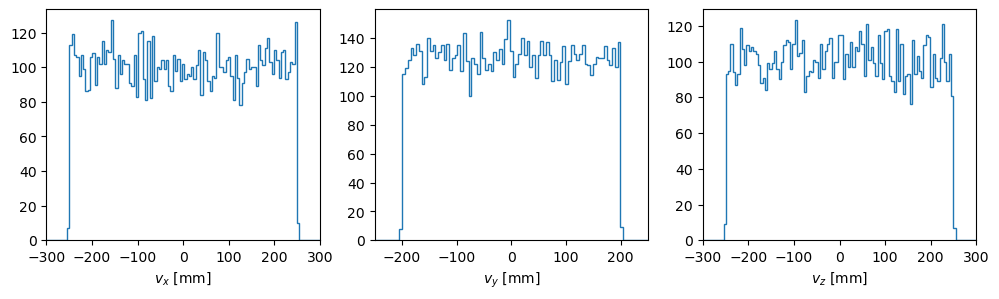

In [11]:
fig, ax = plt.subplots(1, 3, figsize = (12, 3) )

ax[0].hist(vertexArray[:,0], bins = np.linspace(-300, 300, 120), histtype = 'step')
ax[0].set_xlabel(r'$v_x$ [mm]')
ax[0].set_xlim( [-300., 300.] )

ax[1].hist(vertexArray[:,1], bins = np.linspace(-250, 250, 100), histtype = 'step')
ax[1].set_xlabel(r'$v_y$ [mm]')
ax[1].set_xlim( [-250., 250.] )

ax[2].hist(vertexArray[:,2], bins = np.linspace(-300, 300, 120), histtype = 'step')
ax[2].set_xlabel(r'$v_z$ [mm]')
ax[2].set_xlim( [-300., 300.] )

## Check $\nu_e$-Ar CC outside the Fiducial Volume

In [12]:
infile = '/Users/yuntse/data/coherent/preLArTPC/geant4/nueArCCoutFiducial/nueArCC_sns_yDir_g4_00.root'

In [13]:
df = pd.DataFrame(ROOT.RDataFrame("edep", infile).AsNumpy())

In [14]:
df

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
0,0.000000,199.752932,248.676944,166.149250,0,0,22,5.313155,220.756743,239.148294,190.363937,4
1,0.000000,196.270496,250.000000,166.397179,0,0,22,1.117071,199.752932,248.676944,166.149250,4
2,0.000000,-215.453470,406.423181,195.709494,0,0,22,1.117071,196.270496,250.000000,166.397179,4
3,0.000000,-27861.980767,10909.959794,2163.978985,0,0,22,1.117071,-215.453470,406.423181,195.709494,4
4,0.734836,197.747638,249.694101,162.249090,0,4,11,4.707083,199.752932,248.676944,166.149250,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1260215,0.199061,-333.039767,-247.661633,16.637691,9999,4,11,0.710060,-332.929977,-247.708012,16.679387,43
1260216,0.309994,-155.820606,-211.668622,299.398665,9999,4,11,1.034251,-155.633896,-211.145695,299.319642,42
1260217,0.213258,-155.866915,-211.602342,299.282947,9999,4,11,0.724257,-155.820606,-211.668622,299.398665,42
1260218,0.000000,66.064582,455.231228,452.680725,9999,0,12,32.297955,66.064582,91.504246,452.680725,1


In [15]:
nEvents = df.event.max()+1

In [16]:
vertexList = []
for iEvt in range(nEvents):
    Evt = df[(df.event==iEvt)&(df.motherID==0)&(df.pdg==11)]
    trackList = Evt.trackID.unique()
    for t in trackList:
        iMuon = Evt[Evt.trackID==t].startE.idxmax()
        vertex = [ Evt.loc[iMuon].startX, Evt.loc[iMuon].startY, Evt.loc[iMuon].startZ ]
        vertexList.append( vertex )
vertexList

[[220.75674295425415, 239.14829432964325, 190.3639373369515],
 [-304.9133718665689, -22.512648105621338, -129.2232071980834],
 [-153.1438901461661, -281.38305742293596, 532.460136897862],
 [-1.2785149924457073, 55.777996648103, -381.2584253959358],
 [136.27552871592343, 207.38504625856876, 164.55738991498947],
 [-268.84248605929315, -194.20251864008605, -500.19024666398764],
 [-191.22988753952086, 360.2938380930573, -327.4585931561887],
 [171.99114894494414, -302.9827623348683, -71.01495880633593],
 [-292.18202725052834, 10.149454092606902, 288.9458463527262],
 [-19.746081652119756, -377.10101338103414, -193.52577393874526],
 [-74.29374768398702, 255.33390388824046, 149.53267760574818],
 [-330.4580683168024, 224.5584828685969, 395.6876157782972],
 [-417.5240374170244, 104.02101575396955, 80.84885766729712],
 [-421.08108974061906, -174.07593922689557, -454.03061555698514],
 [170.9145873785019, -371.53450553305447, -452.479843609035],
 [-169.51453485526145, -293.8784291315824, -429.32733

In [17]:
vertexArray = np.array( vertexList )
vertexR = np.array([ np.sqrt(vtxx**2+vtxy**2) for vtxx, vtxy in zip(vertexArray[:,0], vertexArray[:,1])])

(0.0, 500.0)

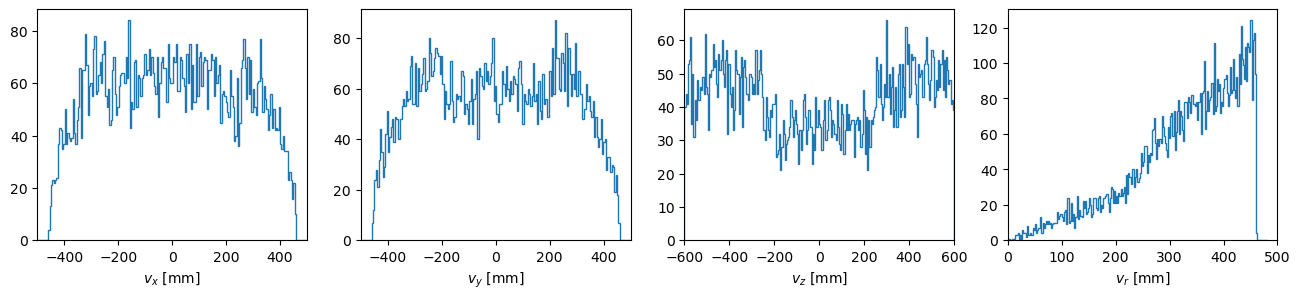

In [18]:
fig, ax = plt.subplots(1, 4, figsize = (16, 3) )

ax[0].hist(vertexArray[:,0], bins = np.linspace(-500, 500, 200), histtype = 'step')
ax[0].set_xlabel(r'$v_x$ [mm]')
ax[0].set_xlim( [-500., 500.] )

ax[1].hist(vertexArray[:,1], bins = np.linspace(-500, 500, 200), histtype = 'step')
ax[1].set_xlabel(r'$v_y$ [mm]')
ax[1].set_xlim( [-500., 500.] )

ax[2].hist(vertexArray[:,2], bins = np.linspace(-600, 600, 240), histtype = 'step')
ax[2].set_xlabel(r'$v_z$ [mm]')
ax[2].set_xlim( [-600., 600.] )

ax[3].hist(vertexR, bins = np.linspace(0, 480, 240), histtype = 'step')
ax[3].set_xlabel(r'$v_r$ [mm]')
ax[3].set_xlim( [0., 500.])

In [21]:
for vtx in vertexArray:
    if np.abs(vtx[0]) < 250. and np.abs(vtx[1]) < 200. and np.abs(vtx[2]) < 250.:
        print( vtx )